In [1]:
!pip install openpyxl ssqueezepy pyts

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2025-01-24 15:50:41.169185: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-24 15:50:41.169262: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-24 15:50:41.169306: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-24 15:50:41.178626: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

In [5]:
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root='PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        output = pd.concat([output, subject], ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

data = load_subjects()

In [6]:
data

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109


In [7]:
data['activity_id'].value_counts()

0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activity_id, dtype: int64

In [8]:
def fix_data(data):
    data = data.drop(data[data['activity_id']==0].index)
    data = data.interpolate()
    # fill all the NaN values in a coulmn with the mean values of the column
    for colName in data.columns:
        data[colName] = data[colName].fillna(data[colName].mean())
    activity_mean = data.groupby(['activity_id']).mean().reset_index()
    return data

data = fix_data(data)

In [9]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,...,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,3.812299e-01,-8.998437e-03,3.023855e-01,-5.698127e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,...,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,3.036803e-01,5.714335e-01,3.326730e-01,4.800388e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,...,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,1.426340e-01,-6.129580e-01,4.914657e-03,-5.378710e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,...,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,2.838390e-01,0.000000e+00,3.055330e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,-9.058870e-01,6.458670e+00,6.775980e+00,...,1.162570e-01,9.181807e-02,-1.790600e+01,1.783892e+01,3.121160e+01,5.600202e-01,6.153723e-01,5.960633e-01,4.382870e-01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.514820e-01,9.961050e-01,1.090000e+02


In [10]:
data

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
2928,37.66,1,107.487925,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1.000000,0.000000,0.000000,0.000000,101
2929,37.67,1,107.487925,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1.000000,0.000000,0.000000,0.000000,101
2930,37.68,1,107.487925,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1.000000,0.000000,0.000000,0.000000,101
2931,37.69,1,107.487925,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1.000000,0.000000,0.000000,0.000000,101
2932,37.70,1,100.000000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,162.000000,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,109
2872016,95.07,24,162.000000,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,109
2872017,95.08,24,162.000000,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,109
2872018,95.09,24,162.000000,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,109


In [11]:
data.isnull().sum()

time_stamp                    0
activity_id                   0
heart_rate                    0
hand_temperature              0
hand_3D_acceleration_16_x     0
hand_3D_acceleration_16_y     0
hand_3D_acceleration_16_z     0
hand_3D_acceleration_6_x      0
hand_3D_acceleration_6_y      0
hand_3D_acceleration_6_z      0
hand_3D_gyroscope_x           0
hand_3D_gyroscope_y           0
hand_3D_gyroscope_z           0
hand_3D_magnetometer_x        0
hand_3D_magnetometer_y        0
hand_3D_magnetometer_z        0
hand_4D_orientation_x         0
hand_4D_orientation_y         0
hand_4D_orientation_z         0
hand_4D_orientation_w         0
chest_temperature             0
chest_3D_acceleration_16_x    0
chest_3D_acceleration_16_y    0
chest_3D_acceleration_16_z    0
chest_3D_acceleration_6_x     0
chest_3D_acceleration_6_y     0
chest_3D_acceleration_6_z     0
chest_3D_gyroscope_x          0
chest_3D_gyroscope_y          0
chest_3D_gyroscope_z          0
chest_3D_magnetometer_x       0
chest_3D

In [12]:
print('Size of the data: ', data.size)
print('Shape of the data: ', data.shape)
print('Number of columns in the data: ', len(data.columns))
result_id = data.groupby(['id']).mean().reset_index()
print('Number of uniqe ids in the data: ', len(result_id))
result_act = data.groupby(['activity_id']).mean().reset_index()
print('Numbe of uniqe activitys in the data: ',len(result_act))

Size of the data:  106857960
Shape of the data:  (1942872, 55)
Number of columns in the data:  55
Number of uniqe ids in the data:  9
Numbe of uniqe activitys in the data:  12


In [13]:
data['activity_id'].value_counts()

4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activity_id, dtype: int64

- 0 : 'transient'
- 1 : 'lying'
- 2 : 'sitting'
- 3 : 'standing'
- 4 : 'walking'
- 5 : 'running'
- 6 : 'cycling'
- 7 : 'Nordic_walking'
- 9 : 'watching_TV'
- 10 : 'computer_work'
- 11 : 'car driving'
- 12 : 'ascending_stairs'
- 13 : 'descending_stairs'
- 16 : 'vacuum_cleaning'
- 17 : 'ironing'
- 18 : 'folding_laundry'
- 19 : 'house_cleaning'
- 20 : 'playing_soccer'
- 24 : 'rope_jumping'


In [14]:
df_activity_4 = data[data['activity_id'] == 4]
df_activity_5 = data[data['activity_id'] == 5]
df_activity_6 = data[data['activity_id'] == 6]
df_activity_7 = data[data['activity_id'] == 7]
df_activity_12 = data[data['activity_id'] == 12]
df_activity_13 = data[data['activity_id'] == 13]
df_activity_16 = data[data['activity_id'] == 16]
df_activity_17 = data[data['activity_id'] == 17]
df_activity_24 = data[data['activity_id'] == 24]

In [15]:
df = pd.concat([df_activity_4, df_activity_5, df_activity_6, df_activity_7, df_activity_12, df_activity_13, df_activity_16, df_activity_17, df_activity_24])
df

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
223759,2245.97,4,123.0,33.500,2.39384,7.36614,5.47782,2.56691,7.46392,5.48657,...,-0.016637,0.010491,-55.1404,-29.035800,1.697770,1.000000,0.000000,0.000000,0.000000,101
223760,2245.98,4,123.0,33.500,2.34508,7.32581,5.16933,2.58159,7.38833,5.51692,...,-0.004149,-0.013735,-55.2608,-28.371300,1.829620,1.000000,0.000000,0.000000,0.000000,101
223761,2245.99,4,123.0,33.500,2.39758,7.51857,5.55434,2.58210,7.44874,5.51679,...,0.000796,-0.009751,-55.2457,-29.797700,1.195390,1.000000,0.000000,0.000000,0.000000,101
223762,2246.00,4,123.0,33.500,2.31932,7.70784,5.43706,2.49320,7.60043,5.54675,...,0.056483,0.009661,-56.0476,-28.340400,1.588830,1.000000,0.000000,0.000000,0.000000,101
223763,2246.01,4,123.0,33.500,2.32734,7.89922,5.62898,2.51043,7.79669,5.60671,...,-0.008582,-0.014538,-55.3821,-27.920900,1.464080,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,109
2872016,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,109
2872017,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,109
2872018,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,109


In [16]:
df.activity_id.value_counts()

4     238761
17    238690
7     188107
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activity_id, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['activity_id']=le.fit_transform(df['activity_id'])

In [18]:
# df= df.drop(['id', 'time_stamp', 'heart_rate', 'hand_temperature', 'ankle_3D_magnetometer_x', 'ankle_3D_magnetometer_y', 'ankle_3D_magnetometer_z'], axis=1)

In [19]:
# PAMAP2 데이터셋에서 필요한 16개 컬럼 선택
selected_columns = [
    'hand_3D_acceleration_16_x', 'hand_3D_acceleration_16_y', 'hand_3D_acceleration_16_z',
    'hand_3D_acceleration_6_x', 'hand_3D_acceleration_6_y', 'hand_3D_acceleration_6_z',
    'hand_3D_gyroscope_x', 'hand_3D_gyroscope_y', 'hand_3D_gyroscope_z',
    'hand_3D_magnetometer_x', 'hand_3D_magnetometer_y', 'hand_3D_magnetometer_z',
    'chest_3D_acceleration_16_x', 'chest_3D_acceleration_16_y', 'chest_3D_acceleration_16_z',
    'chest_3D_acceleration_6_x', 'chest_3D_acceleration_6_y', 'chest_3D_acceleration_6_z',
    'chest_3D_gyroscope_x', 'chest_3D_gyroscope_y', 'chest_3D_gyroscope_z',
    'chest_3D_magnetometer_x', 'chest_3D_magnetometer_y', 'chest_3D_magnetometer_z',
    'ankle_3D_acceleration_16_x', 'ankle_3D_acceleration_16_y', 'ankle_3D_acceleration_16_z',
    'ankle_3D_acceleration_6_x', 'ankle_3D_acceleration_6_y', 'ankle_3D_acceleration_6_z',
    'ankle_3D_gyroscope_x', 'ankle_3D_gyroscope_y', 'ankle_3D_gyroscope_z',
    'ankle_3D_magnetometer_x', 'ankle_3D_magnetometer_y', 'ankle_3D_magnetometer_z'
]

# 데이터셋에서 해당 컬럼 추출
X = df[selected_columns]

# 결과 확인
print(X.head())

        hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
223759                    2.39384                    7.36614   
223760                    2.34508                    7.32581   
223761                    2.39758                    7.51857   
223762                    2.31932                    7.70784   
223763                    2.32734                    7.89922   

        hand_3D_acceleration_16_z  hand_3D_acceleration_6_x  \
223759                    5.47782                   2.56691   
223760                    5.16933                   2.58159   
223761                    5.55434                   2.58210   
223762                    5.43706                   2.49320   
223763                    5.62898                   2.51043   

        hand_3D_acceleration_6_y  hand_3D_acceleration_6_z  \
223759                   7.46392                   5.48657   
223760                   7.38833                   5.51692   
223761                   7.44874                  

In [20]:
# X = df.drop(['activity_id'], axis=1)
y = df['activity_id']

# Standard Scaling

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X)
scaled_X['activity'] = y.values

scaled_X

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,activity
0,1.482549,0.467945,0.563993,1.506926,0.508377,0.528154,-0.049420,-0.061288,-0.034028,-0.910335,...,-0.145822,-0.192051,0.527636,-0.014889,0.043462,0.001315,-1.224980,-1.264404,-0.847106,0
1,1.474280,0.462724,0.489777,1.509420,0.498077,0.535503,-0.071687,-0.081961,-0.033778,-0.890497,...,-0.140871,-0.195913,0.551422,0.007098,0.060004,-0.008821,-1.232667,-1.234261,-0.840310,0
2,1.483184,0.487677,0.582402,1.509506,0.506309,0.535471,-0.084199,-0.065975,-0.052225,-0.930331,...,-0.138459,-0.205613,0.539564,0.006586,0.066555,-0.007154,-1.231703,-1.298966,-0.872998,0
3,1.469912,0.512179,0.554187,1.494408,0.526980,0.542725,-0.119828,-0.046708,-0.068198,-0.924611,...,-0.145774,-0.197855,0.547510,0.002220,0.140323,0.000967,-1.282901,-1.232859,-0.852720,0
4,1.471272,0.536954,0.600358,1.497334,0.553724,0.557242,-0.219925,-0.044687,-0.068350,-0.895711,...,-0.145761,-0.192037,0.551439,0.014661,0.054131,-0.009157,-1.240412,-1.213830,-0.859150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375225,1.923609,0.293526,0.592978,1.904508,0.316765,0.575850,-0.187786,-0.146579,0.128206,-1.324621,...,-0.208186,-0.411390,0.089256,0.007569,0.048431,-0.000615,-0.627713,0.015000,-0.943375,8
1375226,1.929202,0.278623,0.565412,1.901626,0.302360,0.546661,-0.178931,-0.162802,0.143506,-1.313623,...,-0.220465,-0.407527,0.069501,-0.000366,0.070307,-0.004846,-0.643521,0.015655,-0.906872,8
1375227,1.935383,0.254028,0.565699,1.916726,0.291969,0.521087,-0.188249,-0.161188,0.150973,-1.297640,...,-0.222891,-0.407523,0.077453,-0.021120,0.018903,-0.004040,-0.610379,-0.003039,-0.906753,8
1375228,1.948111,0.244130,0.566031,1.916232,0.267255,0.480967,-0.152540,-0.138832,0.147797,-1.318845,...,-0.213159,-0.411411,0.057561,-0.029473,0.017206,-0.006035,-0.635617,0.027075,-0.899555,8


In [22]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 128
STEP = 40

X, y = create_dataset(scaled_X.drop(['activity'], axis=1), scaled_X['activity'], TIME_STEPS,
                                  STEP)

In [23]:
# Create train and test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=111)
trainX, valX, trainy, valy  = train_test_split(trainX, trainy, test_size=0.2, random_state=111)

In [24]:
trainX.shape, testX.shape, trainy.shape, testy.shape 

((22001, 128, 36), (6876, 128, 36), (22001, 1), (6876, 1))

In [25]:
# Convert output variables to categorical for CNN
trainy_one_hot = to_categorical(trainy)
print(trainy_one_hot.shape)

testy_one_hot = to_categorical(testy)
print(testy_one_hot.shape)

valy_one_hot = to_categorical(valy)
print(valy_one_hot.shape)

(22001, 9)
(6876, 9)
(5501, 9)


In [26]:
import os

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate, Layer, RepeatVector, Add, Permute, Multiply

# KERAS_ATTENTION_DEBUG: If set to 1. Will switch to debug mode.
# In debug mode, the class Attention is no longer a Keras layer.
# What it means in practice is that we can have access to the internal values
# of each tensor. If we don't use debug, Keras treats the object
# as a layer, and we can only get the final output.
debug_flag = int(os.environ.get('KERAS_ATTENTION_DEBUG', 0))


# References:
# - https://arxiv.org/pdf/1508.04025.pdf (Luong).
# - https://arxiv.org/pdf/1409.0473.pdf (Bahdanau).
# - https://machinelearningmastery.com/the-bahdanau-attention-mechanism/ (Some more explanation).

class Attention(object if debug_flag else Layer):
    SCORE_LUONG = 'luong'
    SCORE_BAHDANAU = 'bahdanau'

    def __init__(self, units: int = 128, score: str = 'luong', **kwargs):
        super(Attention, self).__init__(**kwargs)
        if score not in {self.SCORE_LUONG, self.SCORE_BAHDANAU}:
            raise ValueError(f'Possible values for score are: [{self.SCORE_LUONG}] and [{self.SCORE_BAHDANAU}].')
        self.units = units
        self.score = score

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        input_dim = int(input_shape[-1])
        with K.name_scope(self.name if not debug_flag else 'attention'):
            # W in W*h_S.
            if self.score == self.SCORE_LUONG:
                self.luong_w = Dense(input_dim, use_bias=False, name='luong_w')
                # dot : last hidden state H_t and every hidden state H_s.
                self.luong_dot = Dot(axes=[1, 2], name='attention_score')
            else:
                # Dense implements the operation: output = activation(dot(input, kernel) + bias)
                self.bahdanau_v = Dense(1, use_bias=False, name='bahdanau_v')
                self.bahdanau_w1 = Dense(input_dim, use_bias=False, name='bahdanau_w1')
                self.bahdanau_w2 = Dense(input_dim, use_bias=False, name='bahdanau_w2')
                self.bahdanau_repeat = RepeatVector(input_shape[1])
                self.bahdanau_tanh = Activation('tanh', name='bahdanau_tanh')
                self.bahdanau_add = Add()

            self.h_t = Lambda(lambda x: x[:, -1, :], output_shape=(input_dim,), name='last_hidden_state')

            # exp / sum(exp) -> softmax.
            self.softmax_normalizer = Activation('softmax', name='attention_weight')

            # dot : score * every hidden state H_s.
            # dot product. SUM(v1*v2). H_s = every source hidden state.
            self.dot_context = Dot(axes=[1, 1], name='context_vector')

            # [Ct; ht]
            self.concat_c_h = Concatenate(name='attention_output')

            # x -> tanh(w_c(x))
            self.w_c = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')
        if not debug_flag:
            # debug: the call to build() is done in call().
            super(Attention, self).build(input_shape)

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

    def __call__(self, inputs, training=None, **kwargs):
        if debug_flag:
            return self.call(inputs, training, **kwargs)
        else:
            return super(Attention, self).__call__(inputs, training, **kwargs)

    # noinspection PyUnusedLocal
    def call(self, inputs, training=None, **kwargs):
        """
        Many-to-one attention mechanism for Keras. Supports:
            - Luong's multiplicative style.
            - Bahdanau's additive style.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim).
        @param training: not used in this layer.
        @return: 2D tensor with shape (batch_size, units)
        @author: philipperemy, felixhao28.
        """
        h_s = inputs
        if debug_flag:
            self.build(h_s.shape)
        h_t = self.h_t(h_s)
        if self.score == self.SCORE_LUONG:
            # Luong's multiplicative style.
            score = self.luong_dot([h_t, self.luong_w(h_s)])
        else:
            # Bahdanau's additive style.
            self.bahdanau_w1(h_s)
            a1 = self.bahdanau_w1(h_t)
            a2 = self.bahdanau_w2(h_s)
            a1 = self.bahdanau_repeat(a1)
            score = self.bahdanau_tanh(self.bahdanau_add([a1, a2]))
            score = self.bahdanau_v(score)
            score = K.squeeze(score, axis=-1)

        alpha_s = self.softmax_normalizer(score)
        context_vector = self.dot_context([h_s, alpha_s])
        a_t = self.w_c(self.concat_c_h([context_vector, h_t]))
        return a_t

    def get_config(self):
        config = super(Attention, self).get_config()
        config.update({'units': self.units, 'score': self.score})
        return config

In [27]:
SINGLE_ATTENTION_VECTOR = False
INPUT_DIMS = 3

def attention_3d_block(inputs):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2])
    a = inputs
    a = tf.keras.layers.Permute((2, 1))(inputs)
    #a = Reshape((input_dim, TIME_STEPS))(a) # this line is not useful. It's just to know which dimension is what.
    a = Dense(input_dim, activation='softmax')(a)
    if SINGLE_ATTENTION_VECTOR:
        a = Lambda(lambda x: K.mean(x, axis=1), name='dim_reduction')(a)
        a = RepeatVector(input_dim)(a)
    a_probs = Permute((1, 2), name='attention_vec')(a)

    #output_attention_mul = merge([inputs, a_probs], name='attention_mul', mode='mul')
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

# Another way of writing the attention mechanism is suitable for the use of the above error source:https://blog.csdn.net/uhauha2929/article/details/80733255
def attention_3d_block2(inputs, single_attention_vector=False):
    # If the upper layer is LSTM, you need return_sequences=True
    # inputs.shape = (batch_size, time_steps, input_dim)
    time_steps = K.int_shape(inputs)[1]
    input_dim = K.int_shape(inputs)[2]
    a = Permute((2, 1))(inputs)
    a = Dense(time_steps, activation='softmax')(a)
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1))(a)
        a = RepeatVector(input_dim)(a)

    a_probs = Permute((2, 1))(a)
    # Multiplied by the attention weight, but there is no summation, it seems to have little effect
    # If you classify tasks, you can do Flatten expansion
    # element-wise
    output_attention_mul = Multiply()([inputs, a_probs])
    return output_attention_mul

In [28]:
INPUT_DIMS = 3

In [29]:
#score='luong'
score='bahdanau'

In [30]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]
n_timesteps, n_features, n_outputs

(128, 36, 9)

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dropout, Flatten

inputs= Input(shape=(n_timesteps,n_features))

lstm_out = LSTM(128, return_sequences=True)(inputs)
lstm_out = LSTM(128, return_sequences=True)(lstm_out)
lstm_out = LSTM(128, return_sequences=True)(lstm_out)
lstm_out = Dropout(0.3)(lstm_out)
attention_mul = attention_3d_block(lstm_out)
attention_mul = Flatten()(attention_mul)

##dense layer
dense = Dense(64, activation='relu')(attention_mul)
outputs = Dense(9, activation='softmax')(dense)
model = Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2025-01-24 15:51:34.635454: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:cd:00.0, compute capability: 8.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 36)]            0         []                            
                                                                                                  
 lstm (LSTM)                 (None, 128, 128)             84480     ['input_1[0][0]']             
                                                                                                  
 lstm_1 (LSTM)               (None, 128, 128)             131584    ['lstm[0][0]']                
                                                                                                  
 lstm_2 (LSTM)               (None, 128, 128)             131584    ['lstm_1[0][0]']              
                                                                                              

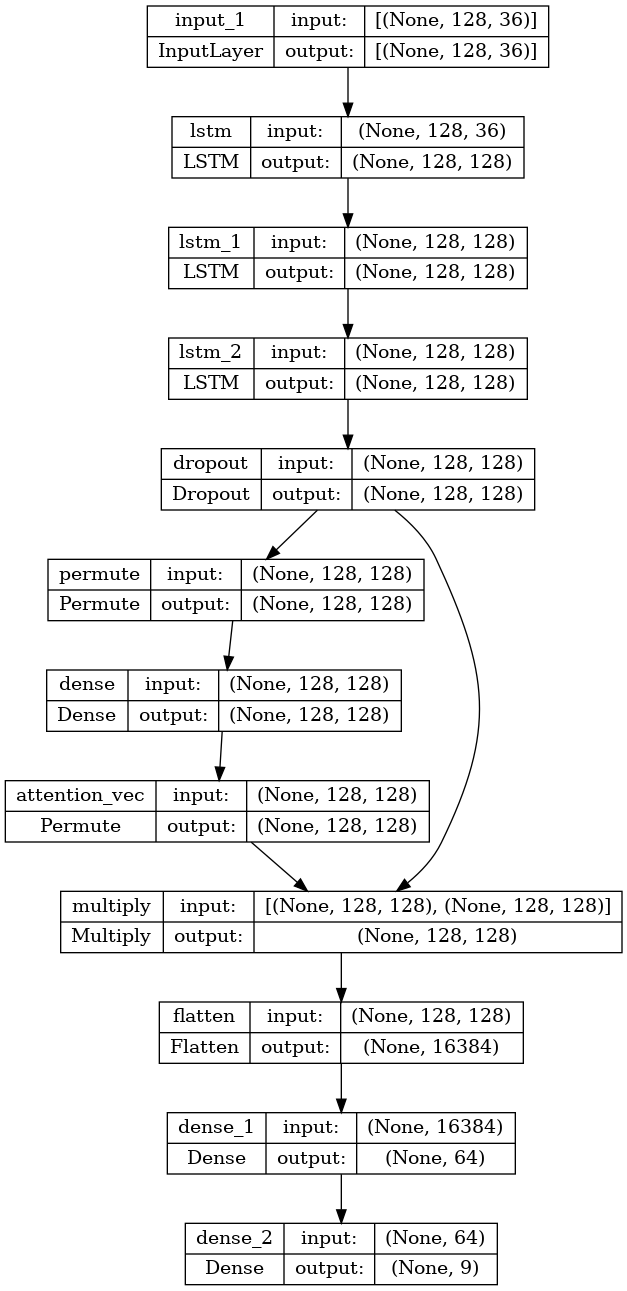

In [32]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [33]:
import math
import time
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

start = time.time()
#model_history=model.fit(X_train, y_train_one_hot, epochs=300, batch_size=32, validation_data=(X_val,y_val_one_hot), callbacks = [early_stopping])
model_history=model.fit(trainX, trainy_one_hot, epochs=50, batch_size=32, validation_data=(valX,valy_one_hot))


end = time.time()
print(f"{end - start:.5f} sec")

Epoch 1/50


2025-01-24 15:51:40.205437: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-01-24 15:51:41.039756: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fba041e3b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-24 15:51:41.039807: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2025-01-24 15:51:41.045063: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-24 15:51:41.125870: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


688/688 [==============================] - 23s 27ms/step - loss: 0.5091 - accuracy: 0.8404 - val_loss: 0.2335 - val_accuracy: 0.9324
Epoch 2/50
688/688 [==============================] - 17s 25ms/step - loss: 0.1896 - accuracy: 0.9392 - val_loss: 0.1668 - val_accuracy: 0.9460
Epoch 3/50
688/688 [==============================] - 17s 25ms/step - loss: 0.1413 - accuracy: 0.9541 - val_loss: 0.1239 - val_accuracy: 0.9564
Epoch 4/50
688/688 [==============================] - 17s 25ms/step - loss: 0.0988 - accuracy: 0.9665 - val_loss: 0.1009 - val_accuracy: 0.9644
Epoch 5/50
688/688 [==============================] - 17s 25ms/step - loss: 0.0862 - accuracy: 0.9716 - val_loss: 0.1091 - val_accuracy: 0.9664
Epoch 6/50
688/688 [==============================] - 17s 25ms/step - loss: 0.0762 - accuracy: 0.9753 - val_loss: 0.0842 - val_accuracy: 0.9760
Epoch 7/50
688/688 [==============================] - 17s 25ms/step - loss: 0.0553 - accuracy: 0.9816 - val_loss: 0.0680 - val_accuracy: 0.9780
Epo

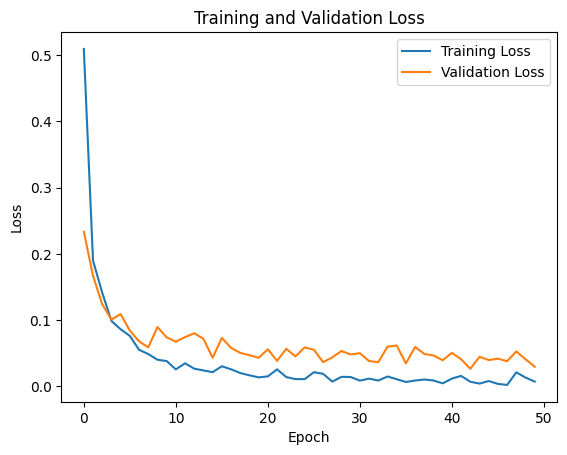

In [34]:
# Plot training and validation loss
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

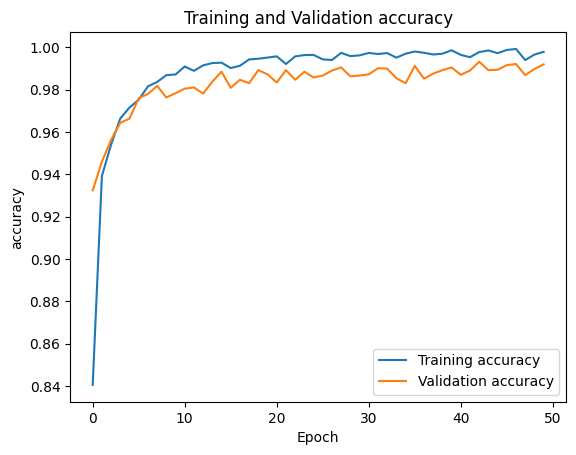

In [35]:
# Plot training and validation loss
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

215/215 [==============================] - 3s 10ms/step
Classification Report:
                   precision    recall  f1-score   support

          walking       1.00      0.99      0.99      1216
          running       1.00      0.99      1.00       507
          cycling       0.99      1.00      0.99       763
   Nordic_walking       0.99      1.00      0.99       893
 ascending_stairs       0.99      0.97      0.98       600
descending_stairs       0.97      0.99      0.98       536
  vacuum_cleaning       0.98      0.99      0.99       886
          ironing       1.00      1.00      1.00      1236
     rope_jumping       0.99      0.98      0.99       239

         accuracy                           0.99      6876
        macro avg       0.99      0.99      0.99      6876
     weighted avg       0.99      0.99      0.99      6876

Test Accuracy: 0.99


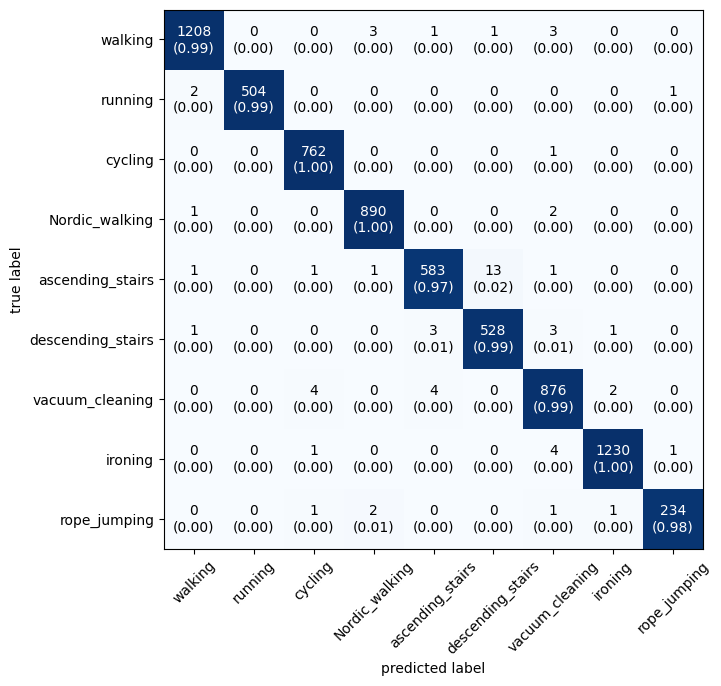

In [36]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# 예측 수행
predy = model.predict(testX)
predy = np.argmax(predy, axis=-1)  # 가장 확률이 높은 클래스를 선택

# 테스트 라벨 (One-Hot Encoding → 정수형 라벨 변환)
testy = np.argmax(testy_one_hot, axis=-1)  # 테스트 레이블 변환

# 라벨 정의
LABELS = ['walking', 'running', 'cycling', 'Nordic_walking', 'ascending_stairs', 'descending_stairs', 'vacuum_cleaning', 'ironing', 'rope_jumping']

# 혼동 행렬 생성
cm = confusion_matrix(testy, predy)

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=cm, class_names=LABELS, show_normed=True, figsize=(7,7))

# 성능 보고서 출력
print("Classification Report:")
print(classification_report(testy, predy, target_names=LABELS))

# 정확도 출력
accuracy = accuracy_score(testy, predy)
print(f"Test Accuracy: {accuracy:.2f}")


In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))

[[1208    0    0    3    1    1    3    0    0]
 [   2  504    0    0    0    0    0    0    1]
 [   0    0  762    0    0    0    1    0    0]
 [   1    0    0  890    0    0    2    0    0]
 [   1    0    1    1  583   13    1    0    0]
 [   1    0    0    0    3  528    3    1    0]
 [   0    0    4    0    4    0  876    2    0]
 [   0    0    1    0    0    0    4 1230    1]
 [   0    0    1    2    0    0    1    1  234]]
0.9911285631180919
0.9911266021990698
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1216
           1       1.00      0.99      1.00       507
           2       0.99      1.00      0.99       763
           3       0.99      1.00      0.99       893
           4       0.99      0.97      0.98       600
           5       0.97      0.99      0.98       536
           6       0.98      0.99      0.99       886
           7       1.00      1.00      1.00      1236
           8       0.99      0.98      0.9